In [2]:
!curl -OL https://github.com/tensorflow/io/raw/master/docs/tutorials/dicom/dicom_00000001_000.dcm
!ls -l dicom_00000001_000.dcm

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   164  100   164    0     0    317      0 --:--:-- --:--:-- --:--:--   316

  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 1024k  100 1024k    0     0   542k      0  0:00:01  0:00:01 --:--:-- 3545k


-rw-r--r-- 1 YTX None 1049332 Mar 10 16:15 dicom_00000001_000.dcm


In [3]:
try:
  # Use the Colab's preinstalled TensorFlow 2.x
  %tensorflow_version 2.x 
except:
  pass

In [4]:
import tensorflow as tf

In [5]:
print(tf.__version__)

2.1.0


In [6]:
!pip install -q tensorflow-io-nightly

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] 拒绝访问。: 'E:\\Projects\\Intepreters\\Anaconda\\envs\\TF21\\Lib\\site-packages\\tensorflow_io\\core\\python\\ops\\libtensorflow_io.so'
Consider using the `--user` option or check the permissions.



## Decode DICOME image

In [7]:
!pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

(1, 512, 512, 1)
(512, 512)


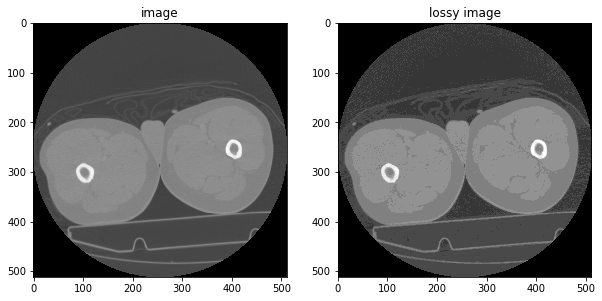

In [10]:
import tensorflow_io as tfio
# my_dcm_path =  "/media/ytx/Japan_Deep_Data/dataset/LeiSang/myTry/BleedingDataDCM/train/ZA-006_000/00000001.DCM"

my_dcm_path =  "E:\\dataset\\Leisang\\myTry\\BleedingDataDCM\\train\\ZA-006_000/00000001.DCM"
# image_bytes = tf.io.read_file('dicom_00000001_000.dcm')
image_bytes = tf.io.read_file(my_dcm_path)

image = tfio.image.decode_dicom_image(image_bytes)

skipped = tfio.image.decode_dicom_image(image_bytes,)

lossy_image = tfio.image.decode_dicom_image(image_bytes, scale='auto', on_error='lossy', dtype=tf.uint8)

print(image.shape)
image =  np.squeeze(image)
print(image.shape)
fig, axes = plt.subplots(1,2, figsize=(10,10))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('image')
axes[1].imshow(np.squeeze(lossy_image.numpy()), cmap='gray')
axes[1].set_title('lossy image');

In [8]:
!conda list

# packages in environment at /home/ytx/anaconda3/envs/TF21Wio:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                        main  
absl-py                   0.9.0                    pypi_0    pypi
astor                     0.8.1                    pypi_0    pypi
attrs                     19.3.0                     py_0  
backcall                  0.1.0                    py37_0  
bleach                    3.1.0                    py37_0  
ca-certificates           2020.1.1                      0  
cachetools                4.0.0                    pypi_0    pypi
certifi                   2019.11.28               py37_0  
chardet                   3.0.4                    pypi_0    pypi
cycler                    0.10.0                   pypi_0    pypi
decorator                 4.4.1                      py_0  
defusedxml                0.6.0                      py_0  
entrypoints               0.3                      py37_0 

In [10]:
# !wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-repo-ubuntu1804_10.1.243-1_amd64.deb
# !sudo dpkg -i cuda-repo-ubuntu1804_10.1.243-1_amd64.deb
# !sudo apt-key adv --fetch-keys https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/7fa2af80.pub
# !sudo apt-get update
# !wget http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64/nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb
# !sudo apt install ./nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb
# !sudo apt-get update

# !conda install cudatoolkit=10.1

Solving environment: done

# All requested packages already installed.



In [11]:
!conda list

# packages in environment at /home/ytx/anaconda/anaconda3/envs/TensorflowV2:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                        main  
_tflow_select             2.1.0                       gpu  
absl-py                   0.8.1                    py37_0  
astor                     0.8.0                    py37_0  
attrs                     19.3.0                     py_0  
backcall                  0.1.0                    py37_0  
blas                      1.0                         mkl  
bleach                    3.1.0                    py37_0  
c-ares                    1.15.0            h7b6447c_1001  
ca-certificates           2020.1.1                      0  
cachetools                4.0.0                    pypi_0    pypi
certifi                   2019.11.28               py37_0  
chardet                   3.0.4                    pypi_0    pypi
cudatoolkit               10.1.243             h6bb024c_0  
cu

In [ ]:
# 